# Spot Curve Cubic Interpolation

#### This program is for deriving spot curve using cubic interpolation.

1. The initial spot rate data is estimated using coupon rate of bonds whose price are very close to par value. 
2. Use four data points each time to estimate a cubic polynomial and interpolate data on missing dates using that polynomial. 
3. Interpolation is based on bootstrap

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import inv

#### 1. import data

In [2]:
spotrate=pd.read_excel("C:/Users/yuxiang/Desktop/fiexed_income_project/Fixed Income Midterm Project I(1).xlsx")
spotrate.Coupon=spotrate.Coupon.astype('float64')
spotrate.YTM=spotrate.YTM.astype('float64')
spotrate['spot']=spotrate.Coupon
spotrate.index+=1

cubic_spot=pd.DataFrame(data=spotrate,columns=['YTM','Coupon','spot'])
cubic_spot

,YTM,Coupon,spot
1,0.5,0.011562,0.011562
2,1.5,0.024583,0.024583
3,2.0,0.022500,0.022500
4,2.5,0.024375,0.024375
5,3.0,0.025000,0.025000
6,4.5,0.025000,0.025000
7,9.0,0.027500,0.027500
8,28.0,0.030000,0.030000
9,29.0,0.030000,0.030000
10,29.5,0.030000,0.030000


#### 2. estimate cubic polynomial and interpolate data on missing dates
inter is for recording interpolated data and the corresponding initial data date interval

In [3]:
inter={}
for i in range(1,len(spotrate)-2): # i=1;
    A=[[spotrate.YTM[i]**3,spotrate.YTM[i]**2,spotrate.YTM[i],1],
       [spotrate.YTM[i+1]**3,spotrate.YTM[i+1]**2,spotrate.YTM[i+1],1],
       [spotrate.YTM[i+2]**3,spotrate.YTM[i+2]**2,spotrate.YTM[i+2],1],
       [spotrate.YTM[i+3]**3,spotrate.YTM[i+3]**2,spotrate.YTM[i+3],1]]
    #spot=[spotrate.Coupon[i+3],spotrate.Coupon[i+2],spotrate.Coupon[i+1],spotrate.Coupon[i]]
    spot=[spotrate.Coupon[i],spotrate.Coupon[i+1],spotrate.Coupon[i+2],spotrate.Coupon[i+3]]
    coef=np.matmul(inv(A),spot)
    for t in [j/2 for j in range(int(spotrate.YTM[i]*2),int(spotrate.YTM[i+3]*2)+1)]:
        if t not in list(cubic_spot.YTM): # t=1.0
            inter[t]=(spotrate.YTM[i],spotrate.YTM[i+3])
            cubic_spot.loc[0]=[t,0.0,np.matmul(coef,[t**3,t**2,t,1.0])]                    
            cubic_spot=cubic_spot.sort_values('YTM') 
            cubic_spot=cubic_spot.reset_index().iloc[:,1:]
            cubic_spot.index+=1

cubic_spot

,YTM,Coupon,spot
1,0.5,0.011562,0.011562
2,1.0,0.000000,0.023359
3,1.5,0.024583,0.024583
4,2.0,0.022500,0.022500
5,2.5,0.024375,0.024375
6,3.0,0.025000,0.025000
7,3.5,0.000000,0.024937
8,4.0,0.000000,0.024750
9,4.5,0.025000,0.025000
10,5.0,0.000000,0.024651


In [4]:
inter

{1.0: (0.5, 2.5),
 3.5: (2.0, 4.5),
 4.0: (2.0, 4.5),
 5.0: (2.5, 9.0),
 5.5: (2.5, 9.0),
 6.0: (2.5, 9.0),
 6.5: (2.5, 9.0),
 7.0: (2.5, 9.0),
 7.5: (2.5, 9.0),
 8.0: (2.5, 9.0),
 8.5: (2.5, 9.0),
 9.5: (3.0, 28.0),
 10.0: (3.0, 28.0),
 10.5: (3.0, 28.0),
 11.0: (3.0, 28.0),
 11.5: (3.0, 28.0),
 12.0: (3.0, 28.0),
 12.5: (3.0, 28.0),
 13.0: (3.0, 28.0),
 13.5: (3.0, 28.0),
 14.0: (3.0, 28.0),
 14.5: (3.0, 28.0),
 15.0: (3.0, 28.0),
 15.5: (3.0, 28.0),
 16.0: (3.0, 28.0),
 16.5: (3.0, 28.0),
 17.0: (3.0, 28.0),
 17.5: (3.0, 28.0),
 18.0: (3.0, 28.0),
 18.5: (3.0, 28.0),
 19.0: (3.0, 28.0),
 19.5: (3.0, 28.0),
 20.0: (3.0, 28.0),
 20.5: (3.0, 28.0),
 21.0: (3.0, 28.0),
 21.5: (3.0, 28.0),
 22.0: (3.0, 28.0),
 22.5: (3.0, 28.0),
 23.0: (3.0, 28.0),
 23.5: (3.0, 28.0),
 24.0: (3.0, 28.0),
 24.5: (3.0, 28.0),
 25.0: (3.0, 28.0),
 25.5: (3.0, 28.0),
 26.0: (3.0, 28.0),
 26.5: (3.0, 28.0),
 27.0: (3.0, 28.0),
 27.5: (3.0, 28.0),
 28.5: (4.5, 29.0)}

#### 3. plot

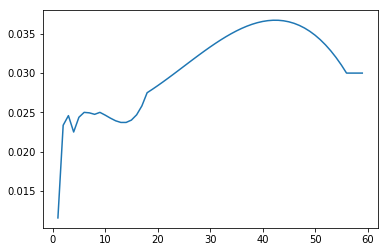

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.plot(cubic_spot.spot)